# Primera consigna

1. Construir un ranking de los mundiales por cantidad de goles anotados en promedio por partido (por ejemplo, en una lista).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

wcMatches = '/content/drive/MyDrive/LaboDatos2022/PrimeraEjercitacion/WorldCupMatches.csv'
wcPlayers = '/content/drive/MyDrive/LaboDatos2022/PrimeraEjercitacion/WorldCupPlayers.csv'

#Comienzo cargando los .csv de drive
dfMatches = pd.read_csv(wcMatches)
dfPlayers = pd.read_csv(wcPlayers)

#Para ambos hago una copia para no afectar los archivos en drive y pido que quite filas con todo NaN y filas duplicadas
dfMatchesSinNaN = dfMatches.dropna(how = 'all').copy()
dfMatchesSinNaN.drop_duplicates(inplace = True)
dfPlayersSinNaN = dfPlayers.dropna(how = 'all').copy()
dfPlayersSinNaN.drop_duplicates(inplace = True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Primero debo obtengo lista de years distintos de los partidos
yearsDistintos = list(dfMatchesSinNaN['Year'].unique())

#Y para cada year distinto quiero contar cuantos goles y cuantos partidos hubieron en total
meanGoles = []

for year in yearsDistintos:
  cantPartidos = 0
  goles = 0

#Para todo año distinto, comparo si ese partido es del year que estoy viendo. Por cada partido de ese year que coincide,
#le suma  1 a la cant de partidos, y en goles suma la cant de goles que hicieron ambos equipos
  for i in dfMatchesSinNaN['Year'].index:
    if dfMatchesSinNaN['Year'][i] == year:
      cantPartidos = cantPartidos + 1
      goles = goles + dfMatchesSinNaN['Home Team Goals'][i] + dfMatchesSinNaN['Away Team Goals'][i]

  #luego calculo el promedio de goles ese year, y se lo agrego a la lista de meanGoles
  promedioPorYear = goles / cantPartidos
  meanGoles.append(promedioPorYear)


#Notar que para un i en yearsDistintos, si busco ese elemento i en meanGoles corresponde al promedio de goles en
#ese i-esimo year del mundial
data = {'Year':yearsDistintos, 'meanGoles': meanGoles}
dfRanking = pd.DataFrame(data)

#y debo ordenar mi dfRanking en orden decreciente de la columna meanGoles
dfRanking.sort_values(by = 'meanGoles', ascending=False, ignore_index=True, inplace = True)
print(dfRanking)

      Year  meanGoles
0   1954.0   5.384615
1   1938.0   4.666667
2   1934.0   4.117647
3   1950.0   4.000000
4   1930.0   3.888889
5   1958.0   3.600000
6   1970.0   2.968750
7   1982.0   2.807692
8   1962.0   2.781250
9   1966.0   2.781250
10  1994.0   2.711538
11  1978.0   2.684211
12  1998.0   2.671875
13  2014.0   2.671875
14  1974.0   2.552632
15  1986.0   2.538462
16  2002.0   2.515625
17  2006.0   2.296875
18  2010.0   2.265625
19  1990.0   2.211538


2. Hacer un gráfico de barras donde en el eje Y figura la cantidad promedio de goles y en el X aparecen los mundiales, ordenados de izquierda a derecha en cantidad decreciente de goles

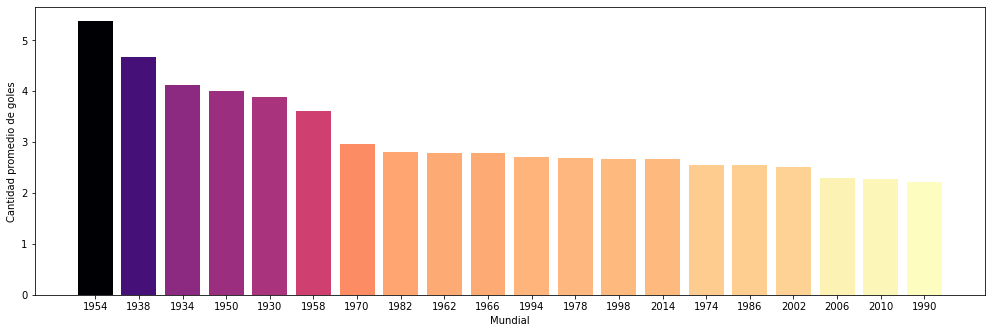

In [ ]:
#cosas por estetica para que la lista de floats de los años sea una lista de strings de ints(?)
nums = [int(x) for x in list(dfRanking['Year'])]
years = [str(x) for x in nums]
meanGol = list(dfRanking['meanGoles'])

my_cmap = plt.get_cmap("magma")
rescale = lambda y: (np.max(y) - y) / (np.max(y) - np.min(y))

fig = plt.figure()
ax = fig.add_axes([0,0,2.2,1])
ax.set_ylabel('Cantidad promedio de goles')
ax.set_xlabel('Mundial')
ax.bar(years, meanGol, color=my_cmap(rescale(meanGol)))
plt.show()

# Segunda consigna

2. Construir un ranking de los países que más partidos ganaron por penales. Representarlo en un gráfico igual que en la consigna anterior.


In [ ]:
#paises que mas partidos ganaron por penales
#o sea quiero obtener una lista con columnas: Paises distintos, cantidad de partidos ganados por penales

#Primero descarto todos los partidos que no tengan en su Win Conditions la palabra 'penalties'

ganarPorPenal = dfMatchesSinNaN['Win conditions'].copy()

for i in ganarPorPenal.index:
  if 'penalties' not in ganarPorPenal[i]:
    ganarPorPenal.drop(i, inplace=True)
  else:
    iDeParentesis = ganarPorPenal[i].rfind(' win') #obtengo indice en string donde está la frase ' win'
    ganarPorPenal[i] = ganarPorPenal[i][:iDeParentesis] #y borro todo lo que esté depués para solo quedarme con el país

#lo bueno de tener ganarPorPenal como una copia de una columna, es que si veo ganarPorPenal.index tengo los indices del
#dfMatches de los partidos que ganaron por penal

#y tengo que arreglar los casos contados que no aclaraba que pais ganó, para ello busco sus índices
#Y el que tenga mayor goles por penal lo asigno como ganador y le agrego el nombre del pais a la columna ganarPorPenal
vacioIndice = list(ganarPorPenal[ganarPorPenal == ''].index)

for k in vacioIndice:
  res = []

  for i in dfMatchesSinNaN['Win conditions'][k]: #siempre sucede que figura como '(Goles Home Team - Goles Away Team)'
    if i.isdigit():
      res.append(i) #asi que por cada numero que aparezca en el string, lo guardo en ese orden en res.

  #O sea, que res tiene la pinta [Goles de Home Team, Goles de Away Team]

  if res[0] > res[1]:
    ganarPorPenal[k] = dfMatchesSinNaN['Home Team Name'][k]
  else:
    ganarPorPenal[k] = dfMatchesSinNaN['Away Team Name'][k]


a = list(ganarPorPenal[ganarPorPenal == 'Germany FR'].index)
ganarPorPenal[a] = 'Germany' #para homogenizar a todos los Germany en uno solo
#print(ganarPorPenal[ganarPorPenal == 'Republic of Ireland'].index) #Busco indice de ese caso
ganarPorPenal[452] = 'Ireland' #xq no queda bien ese nombre tan largo en la grafica

#print(ganarPorPenal)

In [ ]:
#Luego ordeno mi dfRanking en orden decreciente de la columna meanGoles
winsPorPenal = []
paises = [] #todos los distintos paises que alguna vez han ganado por penalties, sin repeticion

for i in ganarPorPenal:
  if i not in paises:
    paises.append(i)

#basicamente haciendo un value counts ya que por cada pais veo cuantos partidos ganaron por penal
for pais in paises:
  partidosW = 0
  for j in ganarPorPenal.index:
    if pais == ganarPorPenal[j]:
      partidosW = partidosW +1
  winsPorPenal.append(partidosW)

#igual que grafica anterior, coincide en este diccionario que i-esimo pais tiene su cantidad de partidos ganadas por goles
#en el i-esimo elemento de winPorPenal
data = {'Paises':paises, 'winsPorPenal': winsPorPenal}
dfData = pd.DataFrame(data)
dfData.sort_values(by = 'winsPorPenal', ascending=False, ignore_index=True, inplace = True)
print(dfData)
print('Han habido '+ str(sum(winsPorPenal))+' partidos ganados por penal ')

            Paises  winsPorPenal
0          Germany             4
1        Argentina             4
2           Brazil             3
3           France             2
4          Ukraine             1
5      Netherlands             1
6          Uruguay             1
7         Paraguay             1
8            Italy             1
9         Portugal             1
10           Spain             1
11  Korea Republic             1
12          Sweden             1
13        Bulgaria             1
14         Ireland             1
15         Belgium             1
16      Costa Rica             1
Han habido 26 partidos ganados por penal 


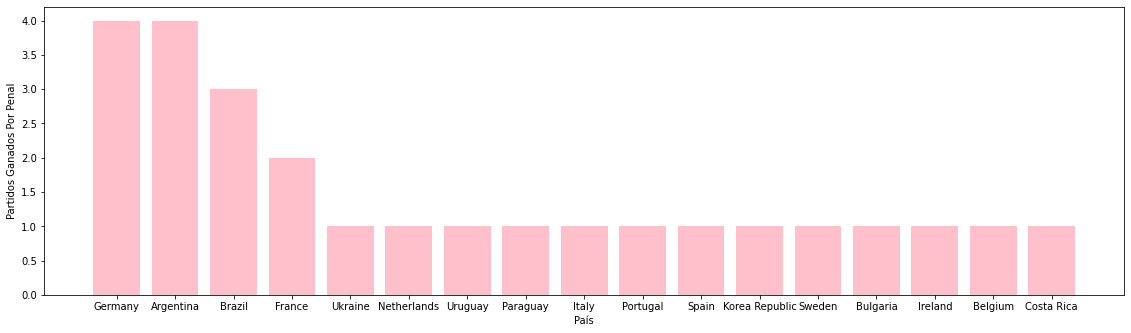

In [ ]:
my_cmap = plt.get_cmap("plasma")
rescale = lambda y: (np.max(y) - y) / (np.max(y) - np.min(y))

fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1])
ax.set_xlabel('País')
ax.set_ylabel('Partidos Ganados Por Penal')
ax.bar(dfData['Paises'], dfData['winsPorPenal'], color = 'pink')#, color=my_cmap(rescale(dataSorted['winsPorPenal'])))
plt.show()

3. ¿Quién fue el arquero que más partidos ganó por penales?


In [ ]:
#solo me interesan los arqueros, no todos los jugadores
arqueros = dfPlayersSinNaN[dfPlayersSinNaN['Position'] != 'C'].copy()
arqueros.dropna(subset = ['Position'], inplace = True) #asi me quedo con todos los GK y GKC

#ahora busco los arqueros que coinciden con MatchID de los 26 partidos que se decidieron por penales
i_en_dfMatches = list(ganarPorPenal.index)
matchesDecididosPorPenal = dfMatchesSinNaN.loc[i_en_dfMatches].copy()

#ahora tengo una lista con los ID unicos de los Matches ganados por penal
matchIDPartidosDePenales = list(matchesDecididosPorPenal['MatchID'].unique())
idPPint = [int(x) for x in matchIDPartidosDePenales]

#Si coincide que eres un arquero pero no jugó en un partido ganado por penal, lo dropea de mi lista de arqueros
for i in arqueros.index:
  if arqueros['MatchID'][i] not in idPPint:
    arqueros.drop(i, inplace = True)

print(len(idPPint))
print(arqueros.shape)

26
(85, 9)


In [ ]:
#y como me estresa más adelante la diferencia en iniciales,
#hago que las iniciales de Germany FR, coincidan con GER de Germany
arqueros['Team Initials'][arqueros['Team Initials'] == 'FRG'] = 'GER'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#ahora me tengo que quedar con solo los arqueros del equipo ganador
pW = list(ganarPorPenal) #rehuso lista de item anterior que me dice cual pais fue el que ganó por penales
matchesDecididosPorPenal = matchesDecididosPorPenal.assign(winnerPais=pW)

print(list(matchesDecididosPorPenal.columns))
print(list(arqueros.columns))

['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Win conditions', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials', 'winnerPais']
['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up', 'Shirt Number', 'Player Name', 'Position', 'Event']


In [ ]:
def dameInicialesDelW(k):

  if k['winnerPais'][:2].upper() == k['Home Team Initials'][:2]:
    res = k['Home Team Initials']
  else:
    res = k['Away Team Initials']

  if k['winnerPais'] == 'Spain':
    res = 'ESP'
  if k['winnerPais'] == 'Germany':
    res = 'GER'


  return res

for i in arqueros.index: #veo por cada uno de los 85 arqueros que tengo
  enQuePartidoEstuvoGK = arqueros['MatchID'][i] #tomo en que partido ID estuvo

  for j in matchesDecididosPorPenal.index: #y veo por cada ID de partido unico ganado por penal que existe
    if matchesDecididosPorPenal['MatchID'].loc[j] == enQuePartidoEstuvoGK: #si es igual al del arquero que estoy viendo
      partidoConPenal = matchesDecididosPorPenal.loc[j]
      break


  inicialesW = dameInicialesDelW(partidoConPenal) #tomo las iniciales del equipo que ganó ese partido

  if inicialesW != arqueros['Team Initials'].loc[i]: #si NO son las iniciales del arquero que estoy viendo, lo dropeo
    arqueros.drop(i, inplace = True) #xq ese arquero, fue del equipo perdedor

print(arqueros.shape) #me quedan entonces 43 arqueros de los equipos que ganaron en partidos decididos por penal

print(len(list(arqueros['MatchID'].unique()))) #siguen habiendo arqueros de todos los 26 matches decididos con penales


(43, 9)
26


In [ ]:
#me quedo con los arqueros tit (xq ya corrobore en la pag de fifa que efectivamente en los matches donde habia mas de un GK,
#el partido comenzaba con el GK tit) a menos de que tenga una 'O' en evento que significa que lo sacaron,
#y dejo entonces a el suplente que que tenga 'I' en evento

#resumen: me quedo con el tit a menos que se demuestre lo contrario

for i in arqueros.index:
  if type(arqueros['Event'].loc[i]) != str: #primero veo si hubo algun evento que puede ser I o O del partido
    if arqueros['Line-up'].loc[i] != 'S': #si no tuvo ningun evento, me quedo con el tit
      arqueros.drop(i, inplace = True)
  elif 'O' in arqueros['Event'].loc[i]: #si hubo evento, me quedo con el que NO tenga 'O' (el que haya quedado I pues)
    arqueros.drop(i, inplace = True)

#El resto de este código es sólo por estética para que imprima lindo la respuesta
rta = list(arqueros['Player Name'].unique())
cant = []

for i in rta:
  a = len(list(arqueros[arqueros['Player Name'] == i].index))
  cant.append(a)

dta = {'jugador' : rta, 'matchXPenal' : cant}
dta = pd.DataFrame(dta)
dta.sort_values(by = 'matchXPenal', ascending = False, ignore_index = True, inplace = True)

maxMatchWs = dta['matchXPenal'].loc[0]

arquerosGanadores = []
for i in dta.index:
  if dta['matchXPenal'].loc[i] == maxMatchWs:
    arquerosGanadores.append(dta['jugador'].loc[i])
  else:
    break

print('RESPUESTA:')
print('1er puesto con más partidos por penales ganados, quedó para: ')
print(arquerosGanadores)
print('')
print('Y el ranking de arqueros por partidos ganados por penales: ')
print(dta)

RESPUESTA:
1er puesto con más partidos por penales ganados, quedó para: 
['Harald SCHUMACHER', 'Sergio GOYCOCHEA', 'TAFFAREL']

Y el ranking de arqueros por partidos ganados por penales: 
              jugador  matchXPenal
0   Harald SCHUMACHER            2
1    Sergio GOYCOCHEA            2
2            TAFFAREL            2
3         SHOVKOVSKYI            1
4                KRUL            1
5              ROMERO            1
6         JULIO CESAR            1
7             MUSLERA            1
8           J. VILLAR            1
9              BUFFON            1
10            RICARDO            1
11            LEHMANN            1
12           CASILLAS            1
13            W J LEE            1
14          Joel BATS            1
15     Fabien BARTHEZ            1
16         Carlos ROA            1
17     Thomas RAVELLI            1
18  Borislav MIHAYLOV            1
19       Bodo ILLGNER            1
20         Pat BONNER            1
21   Jean Marie PFAFF            1
22     

# Tercera consigna

4. Construir un histograma que muestra como están distribuidos los goles a lo largo de la duración de un partido. Es decir, armar un gráfico que divida los '90 minutos de un partido en bines de 4 minutos en el eje X, y que tenga en el eje Y la cantidad total de goles anotados en el bin correspondiente.

In [ ]:
print(dfMatchesSinNaN.shape)
print(dfPlayersSinNaN.shape)
temp = (dfMatchesSinNaN.copy()).drop(labels = 'RoundID', axis = 1)
#combino ambos csv mediante la columna MatchID y confirmo que haya misma cant de filas en el df final que en el de players
dfPyM = dfPlayersSinNaN.merge(temp, on = 'MatchID', how = 'inner', copy = False).copy()
print(dfPyM.shape)

(836, 20)
(37048, 9)
(37048, 27)


In [ ]:
df = dfPyM.copy()

def queSoloHayaGol(s):
  if type(s) == str and ('G' in s or 'P' in s or 'W' in s):
    a = dameMinDelGol(s.split())
    return a
  else:
    return [999] #pongo esta lista con un valor que es imposible que sea un min de gol en futbol para poder eliminarlo despues

def dameMinDelGol(lista):
  a = []
  for i in np.arange(0, len(lista)):
    if ('G' in lista[i]) or ('P' in lista[i]) or ('W' in lista[i]):

      if 'MP' not in lista[i]: #porque significaria que falló el penal
        a.append(int(lista[i][1:len(lista[i])-1])) #que me pase a int el numero sin la letra al inicio y sin el ' al final

  return a

#Obtengo para cada indice, una lista con los mins donde hubieron gol/es
losGoles = df['Event'].copy().apply(queSoloHayaGol)

In [ ]:
#Elimino los casos donde no hubo gol de la lista
iTemp = []
for i in losGoles.index:
  if losGoles[i] == [999]:
    iTemp.append(i)

losGoles.drop(iTemp, inplace = True)
#y ahora si, tengo una lista que me dice indice de jugador que anotó gol/es, y una lista del min cuando lo hizo
print(losGoles.shape)

#Ahora calculo cuantos goles hubo en cada franja de 4 min hasta los 90 min
x = np.arange(4, 90, 4)
#Hago de 2 min la ultima franja
x = np.append(x, 90)
print(x)
y = np.zeros(len(x))

for i in losGoles.index:
  for k in losGoles[i]:
    for j in np.arange(0,len(x)):
      if(k <= x[j]):
        y[j] = y[j] + 1
        break

print(sum(y))

(2039,)
[ 4  8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80 84 88 90]
2317.0


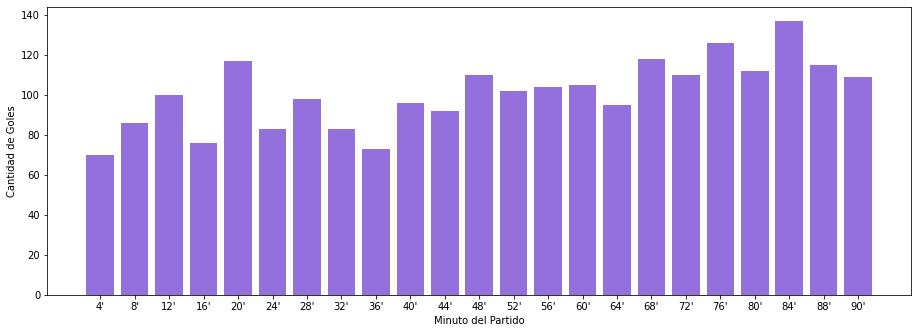

In [ ]:
xBar = [(str(i)+"'") for i in x]

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.set_xlabel('Minuto del Partido')
ax.set_ylabel('Cantidad de Goles')
ax.bar(xBar, y, color= 'mediumpurple') #color = plt.get_cmap('tab10').colors)
plt.show()

5. Hacerlo por separado para la fase de grupos y para la fase de eliminación (todos los partidos posteriores a la fase de grupos).

In [ ]:
#separando por index los goles
#Para hacer un histograma con los goles de todos los que digan Grupos
#hago una funcion que diga esPartidoDeGrupo, para usar .apply y descartar a los que no son

#en otro DF que sea copia de los goles totales, tomo los indices que si es partido de grupo, y pido que los dropee

indiceConGoles = list(losGoles.index)
golesYStage = dfPyM.loc[indiceConGoles].copy() #hago una copia de el df que es la union de los dos cvs que tenia
#y pido que deje solo los indices donde hubo gol
golesYStage = golesYStage.assign(losGoles = list(losGoles)) #le pido que agrege columna con min de goles
golesYStage = golesYStage[['Stage', 'losGoles']] #y deja solo la columna de Stage y minConLosGoles

def estaEnStageGrupo(s):
  if 'Group' in s:
    return 1
  else:
    return 0

golesYStage['Stage'] = golesYStage['Stage'].apply(estaEnStageGrupo)

golesEnGrupo = golesYStage[golesYStage['Stage'] == 1]
golesEnGrupo = golesEnGrupo['losGoles']


golesEnFaseEliminacion = golesYStage[golesYStage['Stage'] == 0]
golesEnFaseEliminacion = golesEnFaseEliminacion['losGoles']

## En fase de grupos:

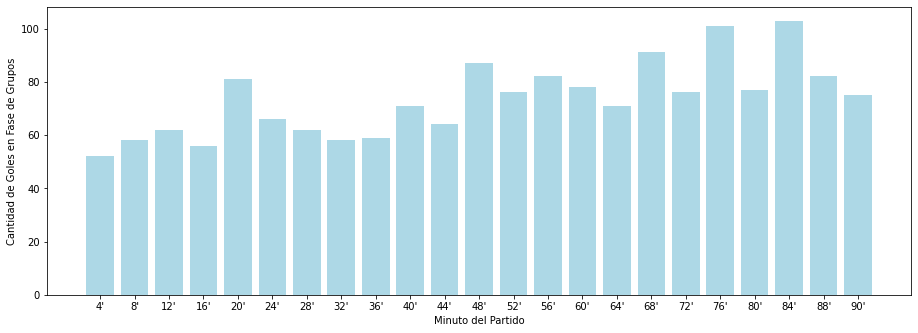

In [ ]:
x = np.arange(4, 90, 4)
x = np.append(x, 90)

y = np.zeros(len(x))

for i in golesEnGrupo.index:
  for k in golesEnGrupo[i]:
    for j in np.arange(0,len(x)):
      #if (x[j] == 92 and k<90):
      if(k <= x[j]):
        y[j] = y[j] + 1
        break

xBar = [(str(i)+"'") for i in x]

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.set_xlabel('Minuto del Partido')
ax.set_ylabel('Cantidad de Goles en Fase de Grupos')
ax.bar(xBar, y, color = 'lightblue')
plt.show()

## En fase de eliminación:

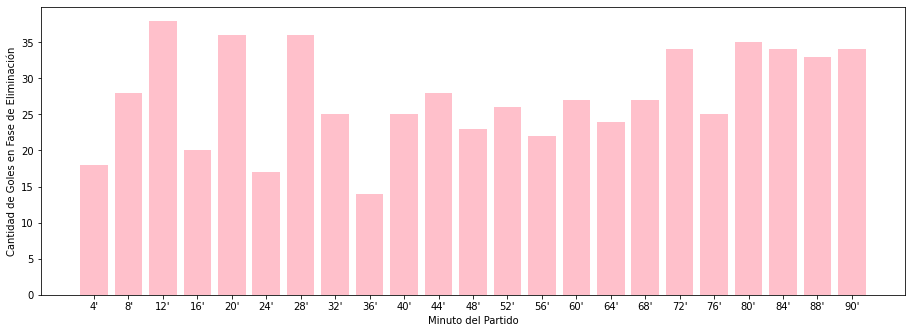

In [ ]:
x = np.arange(4, 90, 4)
x = np.append(x, 90)

y = np.zeros(len(x))

for i in golesEnFaseEliminacion.index:
  for k in golesEnFaseEliminacion[i]:
    for j in np.arange(0,len(x)):
      if(k <= x[j]):
        y[j] = y[j] + 1
        break

xBar = [(str(i)+"'") for i in x]

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.set_xlabel('Minuto del Partido')
ax.set_ylabel('Cantidad de Goles en Fase de Eliminación')
ax.bar(xBar, y, color = 'pink')
plt.show()

# Cuarta consigna

6. Para los partidos en los que hubo al menos algún gol, obtener el tiempo que transcurrió hasta el primer gol. Hacer un histograma de la distribución de estos valores.


In [ ]:
#al menos un gol
#1ero filtrar por al menos un gol
indiceConGoles = list(losGoles.index)
playersQueHicieronGol = dfPyM.loc[indiceConGoles].copy()
playersQueHicieronGol = playersQueHicieronGol.assign(losGoles = list(losGoles))
#filtrar 1er gol del partido
#ver por cada matchID, cual es el losGoles valor mas chico (es decir, 1er gol del partido)
matchIDConGol = list(playersQueHicieronGol['MatchID'].unique())


primerosGoles = []

for i in matchIDConGol:
  partido = playersQueHicieronGol[playersQueHicieronGol['MatchID'] == i]
  temp = list(partido['losGoles'])
  tDeGolesEnPartidoI = []
  for j in temp:
    for k in j:
      tDeGolesEnPartidoI.append(k) #hago una unica lista por partido de los min en cuando se anotó un gol
  #y pido que por cada partido, agrege a la lista 'primerosGoles', el mínimo de los minutos en los que sucedió un gol
  primerosGoles.append(min(tDeGolesEnPartidoI))


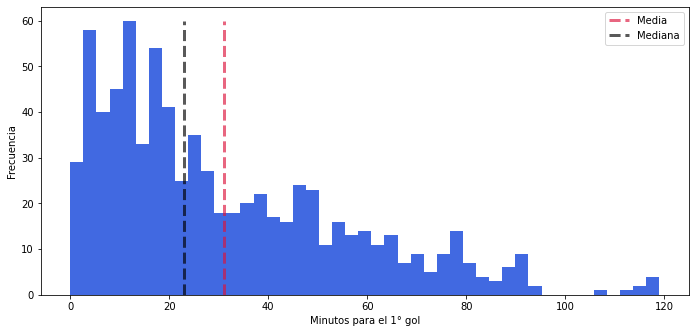

Media: 31.011749347258487
Mediana: 23.0


In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Minutos para el 1° gol')
ax.hist(primerosGoles, bins = 45, range=[0, max(primerosGoles)], color = 'royalblue') #dist normal?

media1 = np.mean(primerosGoles)
mediana1 = np.median(primerosGoles)
ax.vlines(media1, ymin = 0, ymax = 60, linewidth = 3, linestyle = '--', alpha = 0.65, color = 'crimson', label = 'Media')
ax.vlines(mediana1, ymin = 0, ymax = 60, linewidth = 3, linestyle = '--', alpha = 0.65, color = 'black', label = 'Mediana')
plt.legend()
plt.show()

print('Media: '+str(media1))
print('Mediana: '+str(mediana1))

7. Para los partidos en los que hubo más de un gol, obtener los tiempos transcurridos entre goles. Hacer un histograma de la distribución de estos valores.


In [ ]:
#df partido con mas de un gol

#al menos un gol
#1ero filtrar por al menos un gol
indiceConGoles = list(losGoles.index)
playersQueHicieronGol = dfPyM.loc[indiceConGoles].copy()
playersQueHicieronGol = playersQueHicieronGol.assign(losGoles = list(losGoles))

matchIDConGol = list(playersQueHicieronGol['MatchID'].unique())

tEntreGoles = []

for i in matchIDConGol: #por cada partido ID
  partido = playersQueHicieronGol[playersQueHicieronGol['MatchID'] == i]
  temp = list(partido['losGoles']) #obtengo una lista de listas con los min de los goles de ese partido

  tDeGolesEnPartidoI = [] #ahora me hago una lista con los min en los que marcó gol en partido i

  for j in temp:
    for k in j:
      tDeGolesEnPartidoI.append(k)

  tDeGolesEnPartidoI.sort() #y la ordeno de menor a mayor

  if len(tDeGolesEnPartidoI) >= 2: #si hay mas de 1 gol, obtengo la diferencia entre el gol k y el gol k+1

    for k in np.arange(0,len(tDeGolesEnPartidoI)-1):
      dis = tDeGolesEnPartidoI[k+1] - tDeGolesEnPartidoI[k]
      tEntreGoles.append(dis) #y lo agrego a la lista con todos los tiempos entre goles

print(len(tEntreGoles))


1613


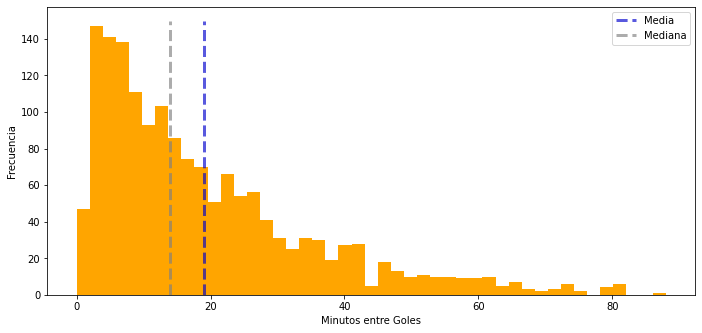

Media: 18.983261004339738
Mediana: 14.0


In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
#ax.set_ylabel('Cantidad de goles')
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Minutos entre Goles')#('Tiempos entre Goles')
#ax.hist(tEntreGoles, bins = max(tEntreGoles)//5, color = 'pink')#, color=my_cmap(rescale(meanGol)) ) #np.arange(0,max(primerosGoles)+1,5) )
ax.hist(tEntreGoles, bins = 45, range=[0, max(tEntreGoles)], color = 'orange') #Tiene pinta de dist Exponencial

media2 = np.mean(tEntreGoles)
mediana2 = np.median(tEntreGoles)
ax.vlines(media2, ymin = 0, ymax = 150, linewidth = 3, linestyle = '--', alpha = 0.65, color = 'mediumblue', label = 'Media')
ax.vlines(mediana2, ymin = 0, ymax = 150, linewidth = 3, linestyle = '--', alpha = 0.65, color = 'gray', label = 'Mediana')
plt.legend()
plt.show()

print('Media: '+str(media2))
print('Mediana: '+str(mediana2))

8. ¿Se parecen estas distribuciones a algunas de las que vimos en clase?

In [ ]:
from scipy import stats

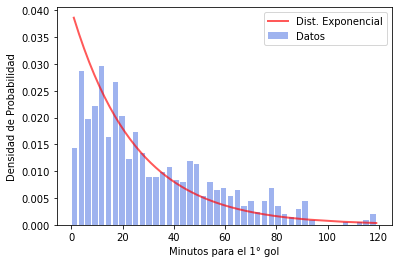

In [ ]:
fig, ax = plt.subplots() #fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (13, 4.5))
ax.hist(primerosGoles, bins = 45, range=[0, max(primerosGoles)], color = 'royalblue', rwidth = 0.8, density = True, alpha = 0.50, label = 'Datos')

primerosGoles.sort()
ax.plot(primerosGoles, stats.expon.pdf(primerosGoles, loc = 0, scale = np.std(primerosGoles)), color = 'r', linewidth = 2, alpha = 0.65, label = 'Dist. Exponencial')

ax.set_ylabel('Densidad de Probabilidad')
ax.set_xlabel('Minutos para el 1° gol')
plt.legend()
plt.show()

Como sabemos que una variable exponencial es la variable aleatoria con la que se suele modelar tiempo continuo hasta que sucede por primera vez un evento. Tenemos entonces que un histograma de los tiempos hasta el 1er gol, debe entonces comportarse como una exponencial.

Las impresiciones que se hay deben ser porque como son partridos, años, jugadores y muchos otros parámetros distintos que están presentes, es por ello no es esperable que quede perfectamente una exponencial, pero a pesar de esto, se parece a esa distribucion.

Si fuese la misma variable aleatoria la que generase todas las muestras, alli si deberia quedar perfectamente graficado como una exponencial. Pero como son distintas variables aleatorias, tienen distribuciones exponenciales distintas.

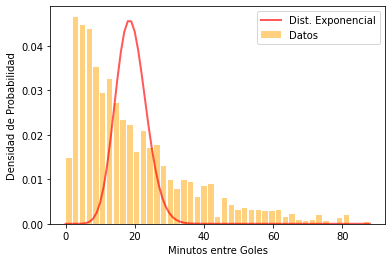

In [ ]:
fig, ax = plt.subplots() #fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (13, 4.5))
ax.hist(tEntreGoles, bins = 45, range=[0, max(tEntreGoles)], color = 'orange', rwidth = 0.8, density = True, alpha = 0.50, label = 'Datos')

tEntreGoles.sort()
ax.plot(tEntreGoles, stats.poisson.pmf(tEntreGoles, mu = np.mean(tEntreGoles))*0.5, color = 'r', linewidth = 2, alpha = 0.65, label = 'Dist. Exponencial')
ax.set_ylabel('Densidad de Probabilidad')
ax.set_xlabel('Minutos entre Goles')
plt.legend()
plt.show()

Deberia comportarse como un proceso de poisson. Ya que indican cuanto tiempo entre goles salen (continuos e independientes), escalado a 90 min. Donde el tiempo entre gol y gol son variables aleatorias exponenciales, y como acalara la teoria de probabilidad y estadistica: en un proceso de Poisson, la distribucion exponencial es la distribucion de probabilidad del tiempo entre sus eventos (el cual indica que eventos ocurren continua e independientemente a una tasa de promedio constante)




